## TSF Task 4 Decision Tree classifier

#### Downlad the data

In [3]:
import pandas as pd
data=pd.read_csv(r"C:\Users\dathr\Downloads\Iris.csv")

#### Show the first five rows of data


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Count the different number of species available

In [3]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#### Visualize the species using bar plot

<BarContainer object of 150 artists>

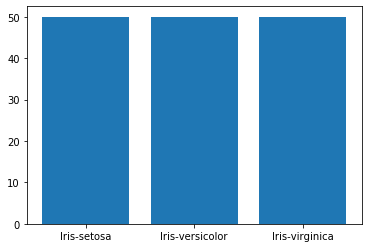

In [5]:
import matplotlib.pyplot as plt
plt.bar(data['Species'],height=data['Species'].value_counts()[0])

### Converting the data into an array form droping the species column

In [7]:
data1=data.drop(columns=['Species','Id'])
data1=data1.values

In [9]:
y=data['Species']

### Divide the data into train and test data with 20 percent given to test data

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data1,y,test_size=0.2)

### Import the decision Tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')

#### Fit the data

In [31]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predict the data

In [32]:
predictions=dtc.predict(test_x)

In [33]:
predictions.reshape(-1,1)

array([['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-virginica']], dtype=object)

### Use accuracy score to get the accuracy 

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predictions)

0.9666666666666667

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,predictions)

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  7]], dtype=int64)

#### Here the accuracy is almost 97 now we predict with inserting random values 

In [39]:
randomprediction=dtc.predict([[6.0,6.0,2.0,2.0]])
randomprediction

array(['Iris-virginica'], dtype=object)

### Visualize the tree graph 

In [24]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dathr\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.1.1             |     pyh9f0ad1d_0          25 KB  conda-forge
    conda-4.8.4                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.1 MB

The following NEW packages will be INSTALLED:

  archspec           conda-forge/noarch::archspec-0.1.1-pyh9f0ad1d_0
  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335

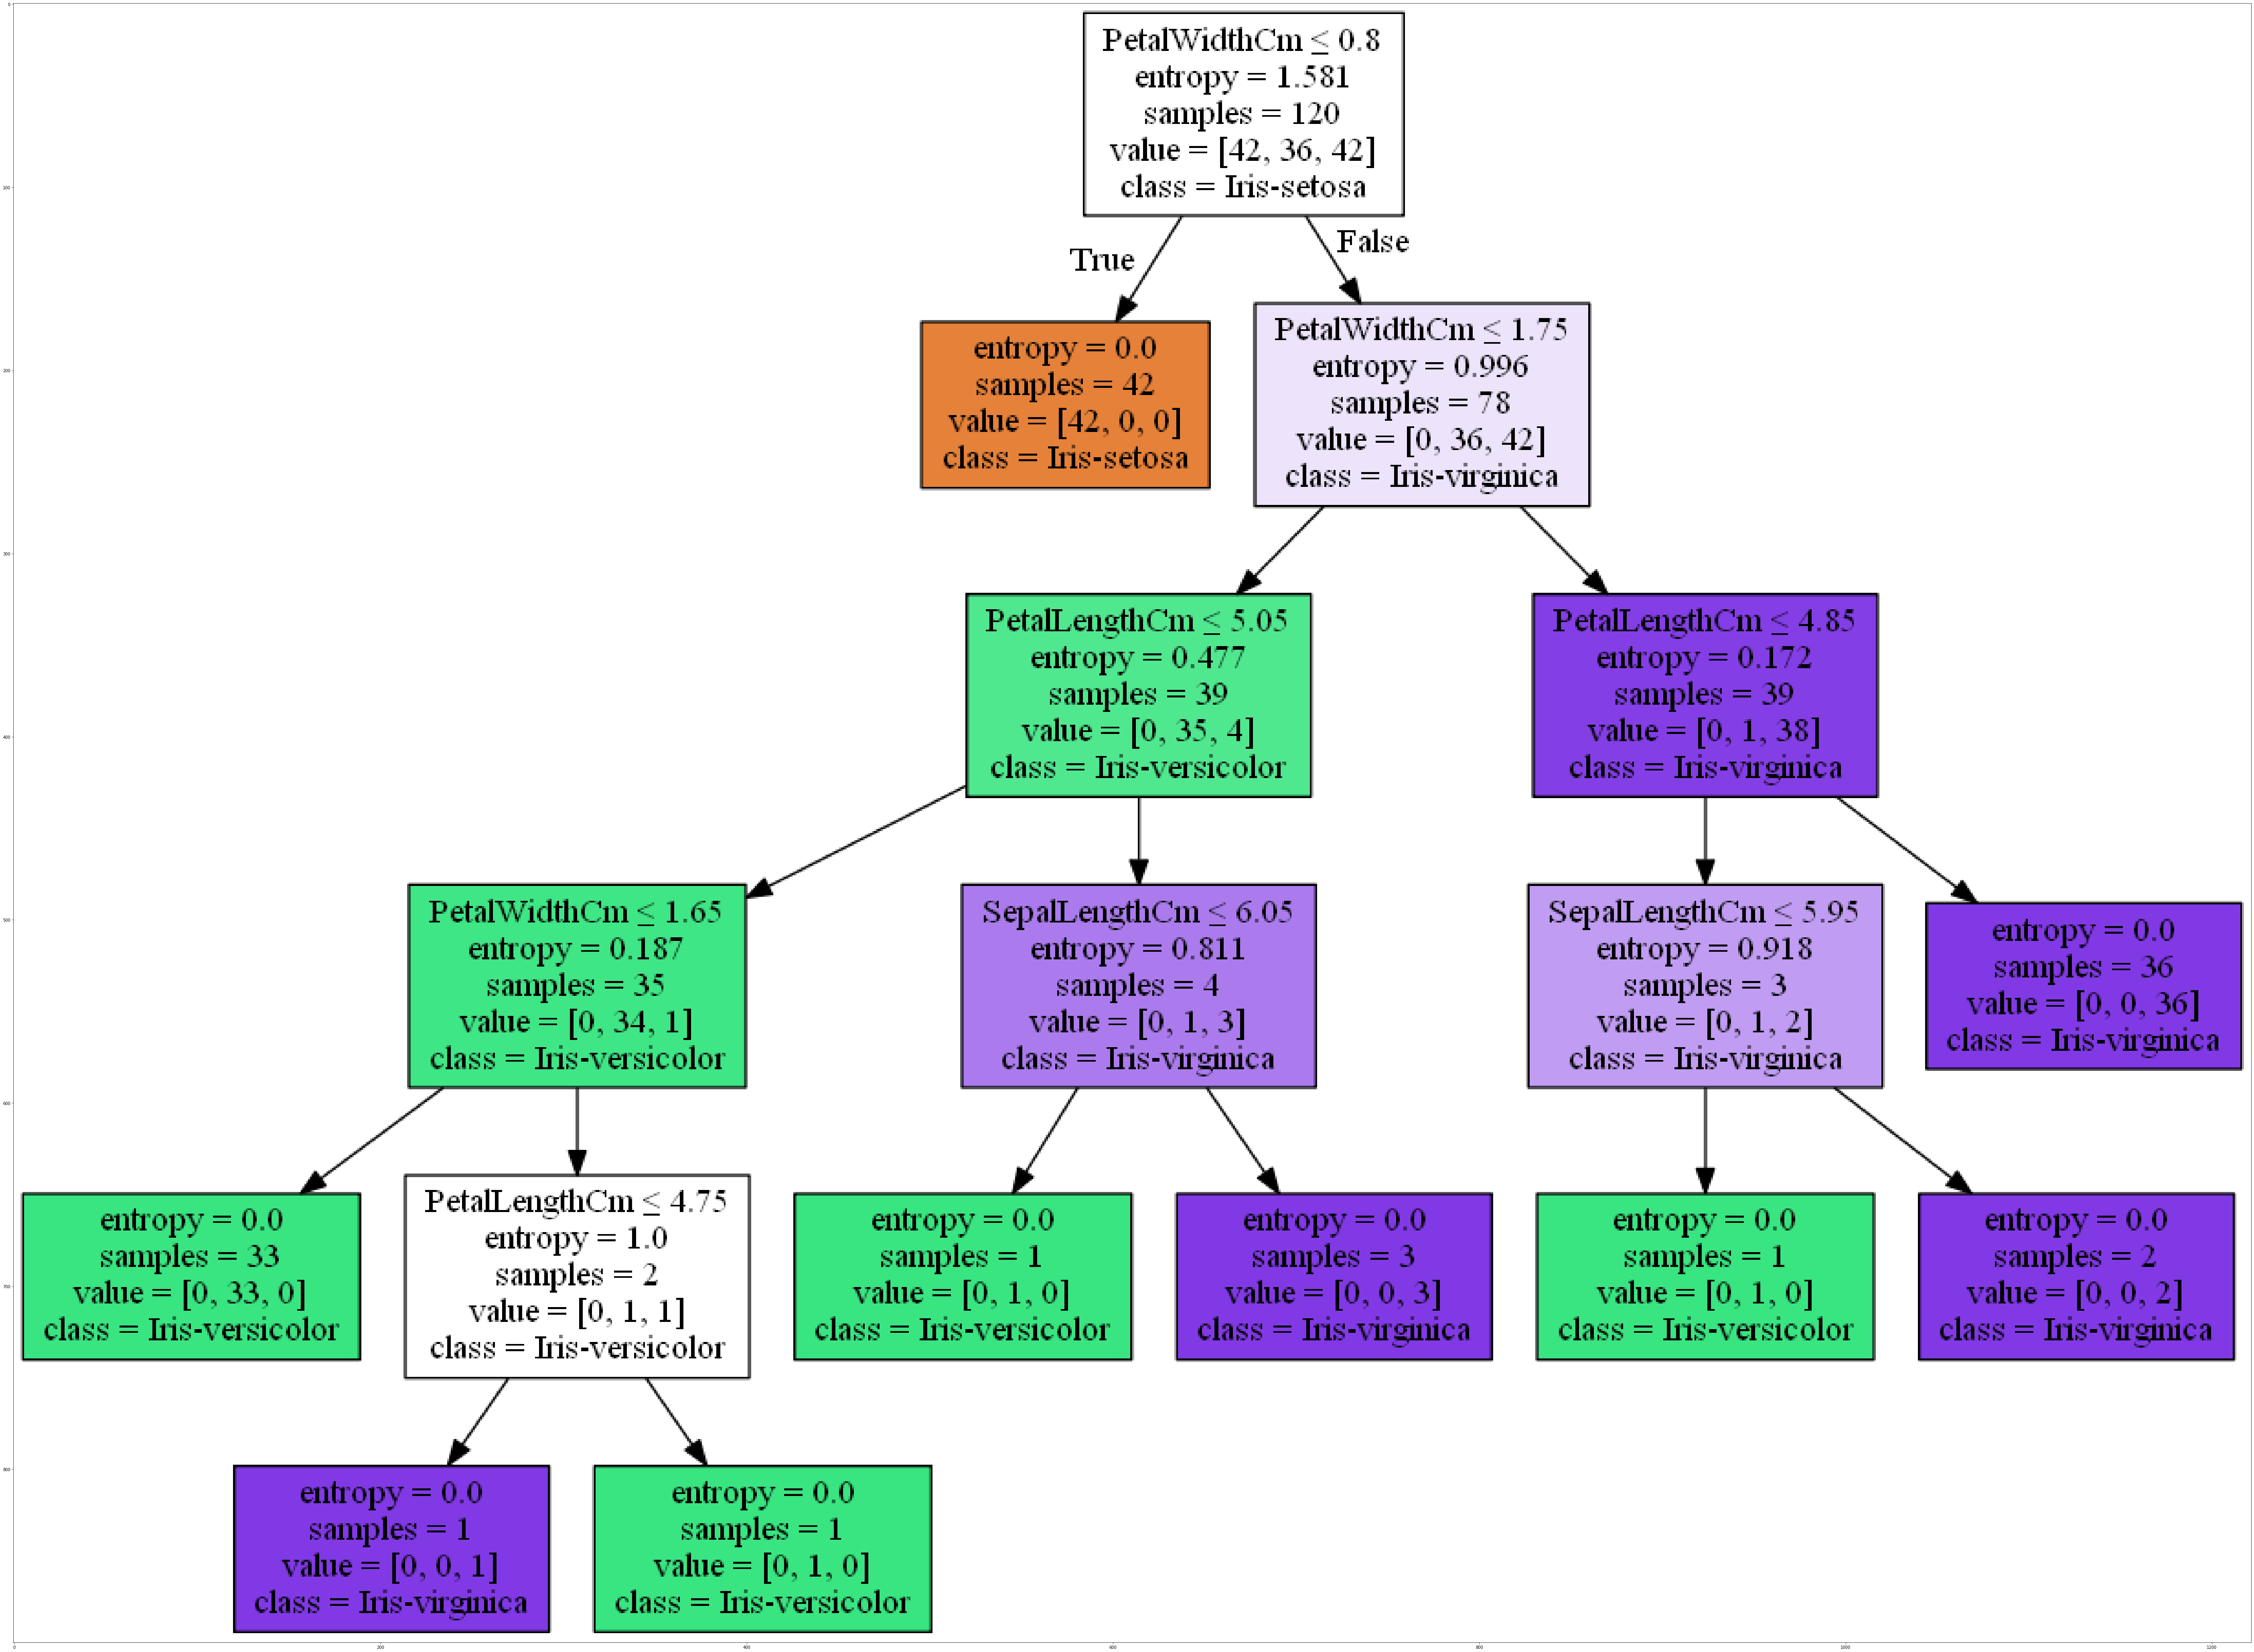

In [40]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 
dot_data = StringIO()
filename = "Species.png"
featureNames = data.columns[1:5]
targetNames = data["Species"].unique().tolist()
out=tree.export_graphviz(dtc,feature_names=featureNames, out_file=dot_data, class_names= np.unique(train_y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')